In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

df.to_csv("pima_diabetes.csv", index=False)

1. Research Objective
The goal of this study is to build a Logistic Regression model to predict whether a patient is likely to be diagnosed with type 2 diabetes based on diagnostic measurements such as glucose level, BMI, age, and insulin levels. This is a binary classification problem.

2. Dataset Description
Source: UCI Machine Learning Repository

Observations: 768 patients

Features:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration

BloodPressure: Diastolic blood pressure

SkinThickness: Triceps skin fold thickness

Insulin: 2-hour serum insulin

BMI: Body mass index

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (in years)

Target:

Outcome: 0 = Non-diabetic, 1 = Diabetic

3. Logistic Regression Implementation

[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC Score: 0.8128558310376492


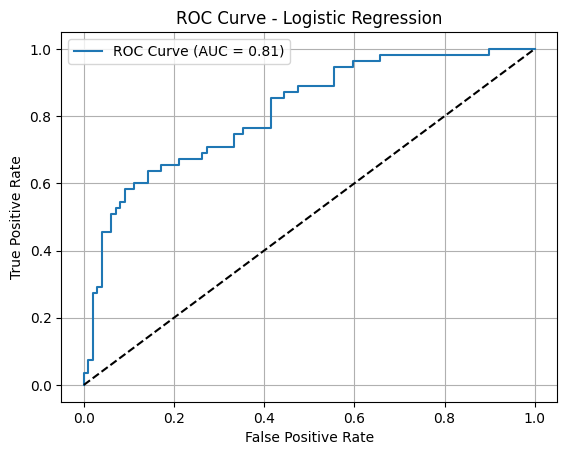

In [2]:
# Train-test split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

4. Results and Interpretation
The model achieved an overall accuracy of 75%, with the following class-specific results:
For class 0 (Non-Diabetic):

Precision: 0.81

Recall: 0.79

F1-score: 0.80

For class 1 (Diabetic):

Precision: 0.64

Recall: 0.67

F1-score: 0.65

The model performs better at identifying non-diabetic patients than diabetic ones, which is a common issue in imbalanced or noisy medical datasets.

The ROC-AUC score was 0.81, indicating strong discriminatory ability between the two classes. The ROC curve shows a clear separation from the baseline diagonal, especially at low false positive rates, suggesting the model has a strong true positive rate in critical ranges.

5. Conclusion
Logistic Regression provides a solid and interpretable baseline for diabetes prediction. With 75% accuracy and an AUC of 0.81, the model shows it can generalize well to unseen data.

Strengths: Good accuracy and class separation; Fast to train and easy to interpret

Weaknesses: Lower recall on the diabetic class; Some features may contain noisy or incomplete values (e.g., zeros for insulin or skin thickness)